# Forecasting Models Project
## time series 기법 전부

In [195]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')

# 1. Time Series Data with Seasonality
## data: google trend '휴가' 검색량 

In [95]:
df = pd.read_csv('./data/daily_user_cleaned.csv')
#df = df.drop('주', axis=0)
#df['time'] = df.index
df = df.reset_index(drop=True)
df = df.rename(columns={'bike_ts_clean': 'amount', 'date': 'time'})
df['amount']

0       9.0
1      22.0
2      23.0
3      11.0
4      21.0
       ... 
725    81.0
726    79.0
727    61.0
728    77.0
729    39.0
Name: amount, Length: 730, dtype: float64

In [96]:
#time index
time_index = range(len(df))
df['time_index'] = time_index
df = df[['time', 'time_index', 'amount']]
#df['amount'] = pd.to_numeric(df['amount'])
df

,time,time_index,amount
0,2018-01-01,0,9.0
1,2018-01-02,1,22.0
2,2018-01-03,2,23.0
3,2018-01-04,3,11.0
4,2018-01-05,4,21.0
...,...,...,...
725,2019-12-27,725,81.0
726,2019-12-28,726,79.0
727,2019-12-29,727,61.0
728,2019-12-30,728,77.0


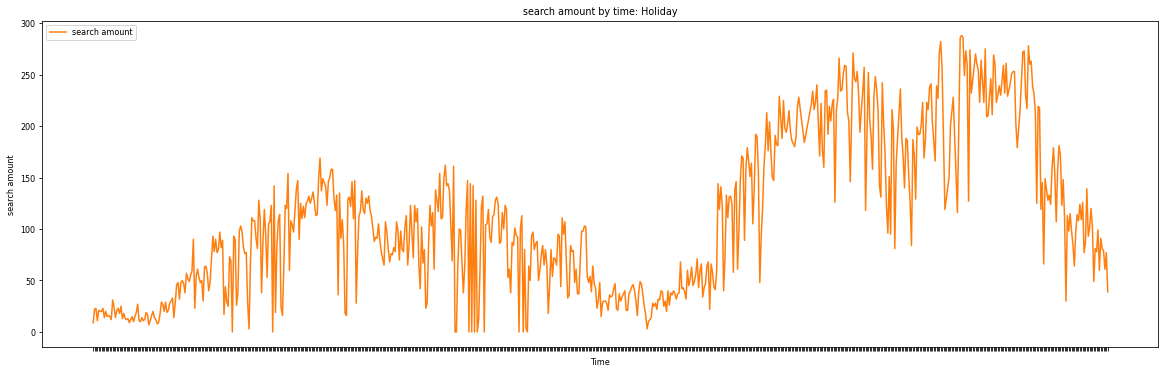

In [97]:
plt.rc('font', size=8)
fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(df.time, df.amount, color='tab:orange', label='search amount')
ax.set_xlabel('Time')
ax.set_xticklabels([], rotation =45)
ax.set_ylabel('search amount')
ax.set_title('search amount by time: Holiday')
ax.legend(loc='upper left')

In [98]:
orign_df = pd.read_csv('./data/daily_user_cleaned.csv')
orign_df = orign_df.rename(columns={'bike_ts_clean': 'amount'})
val_train_data, test_data = train_test_split(orign_df, test_size=0.15, shuffle=False, random_state=0) 
train_data, valid_data = train_test_split(val_train_data, test_size=1.5/8.5, shuffle=False, random_state=0)

In [99]:
train_data

,date,amount
0,2018-01-01,9.0
1,2018-01-02,22.0
2,2018-01-03,23.0
3,2018-01-04,11.0
4,2018-01-05,21.0
...,...,...
505,2019-05-21,189.0
506,2019-05-22,218.0
507,2019-05-23,228.0
508,2019-05-24,217.0


## 1-1. 
## A. Modeling seasonal variation using binary vaeiables

In [168]:
def forecasting_results(y_fitted, y_pred):
    # The mean squared error
    print('Mean squared error: %.2f'
        % mean_squared_error(y_valid, y_pred))


    # Plot outputs
    plt.rc('font', size=12)
    fig, ax = plt.subplots(figsize=(15, 6))

    ax.plot(train_data.date, y_train, color='tab:blue', label='train')
    ax.plot(train_data.date, y_fitted, color='tab:orange', label='fitted')
    ax.plot(valid_data.date, y_valid, color='tab:green', label='valid: actual')
    ax.plot(valid_data.date, y_pred, color='tab:red', label='valid: predicted')
    ax.set_xlabel('Time')
    ax.set_xticklabels([], rotation =45)
    ax.set_ylabel('amount')
    #ax.set_title('Time series: Linear Regression')
    plt.xticks([])
    ax.legend(loc='best')

In [169]:
# 월별 dummy variable 추가
df_season = []
for time in df['time']:
    for i in range(0, 10):
        if '-0'+str(i)+'-' in time:
            df_season.append(i)            
    for i in range(10, 13):
        if '-'+str(i)+'-' in time:
            df_season.append(i)    

df['season'] = df_season

#one_hot encoding|
onehot = pd.get_dummies(df['season'])
df_onehot = pd.concat([df, onehot], axis=1)
df_onehot = df_onehot.drop(['time', 'season'], axis=1)
df_onehot

KeyError: 'time'

In [ ]:
#train:test = 8:2
X = df_onehot.loc[:, df_onehot.columns != 'amount']
X_val_train, X_test = train_test_split(X, test_size=0.15, shuffle=False, random_state=0) 
X_train, X_valid = train_test_split(X_val_train, test_size=1.5/8.5, shuffle=False, random_state=0)

y = df_onehot['amount']
y_val_train, y_test = train_test_split(y, test_size=0.15, shuffle=False, random_state=0) 
y_train, y_valid = train_test_split(y_val_train, test_size=1.5/8.5, shuffle=False, random_state=0)

In [171]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_fitted = model.predict(X_train)
y_pred = model.predict(X_valid)

Mean squared error: 4795.79


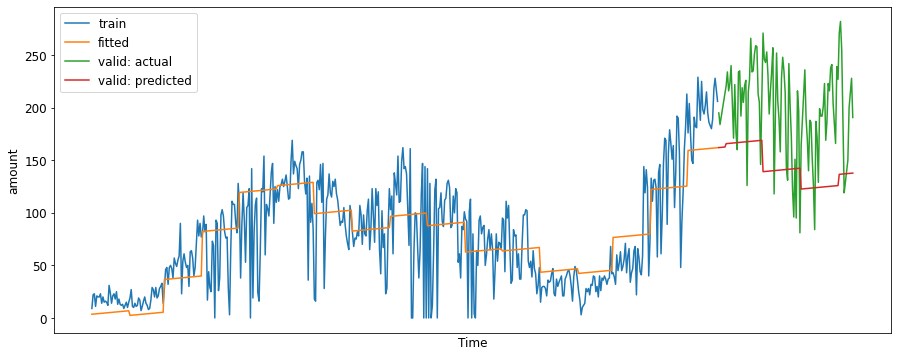

In [172]:
forecasting_results(y_fitted, y_pred)

## B.Trigonometric Model

In [173]:
df_tri = df.copy()

#sin, cos variable 추가
sin_1 = []
cos_1 = []
sin_2 = []
cos_2 = []

for i in df_tri['time_index']:
    sin_1.append(np.sin(2*np.pi*i / 12))
    cos_1.append(np.cos(2*np.pi*i / 12))
    sin_2.append(np.sin(4*np.pi*i / 12))
    cos_2.append(np.cos(4*np.pi*i / 12))

df_tri['sin_1'] = sin_1
df_tri['cos_1'] = cos_1
df_tri['sin_2'] = sin_2
df_tri['cos_2'] = cos_2
df_tri = df_tri.drop(['time', 'season'], axis=1)

KeyError: 'time_index'

In [ ]:
df_tri

### B-(1). sin, cos term 각 하나씩

In [ ]:
df_tri_1 = df_tri.drop(['sin_2', 'cos_2'], axis=1)

#train:test = 8:2
X = df_tri_1.loc[:, df_tri_1.columns != 'amount']
X_val_train, X_test = train_test_split(X, test_size=0.15, shuffle=False, random_state=0) 
X_train, X_valid = train_test_split(X_val_train, test_size=1.5/8.5, shuffle=False, random_state=0)

y = df_tri_1['amount']
y_val_train, y_test = train_test_split(y, test_size=0.15, shuffle=False, random_state=0) 
y_train, y_valid = train_test_split(y_val_train, test_size=1.5/8.5, shuffle=False, random_state=0)

Mean squared error: 4795.79


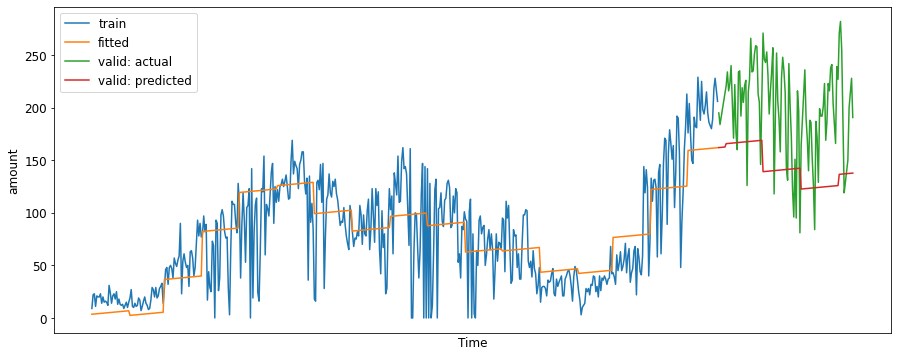

In [176]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_fitted = model.predict(X_train)
y_pred = model.predict(X_valid)
forecasting_results(y_fitted, y_pred)

### B-(1). sin, cos term 각 두 개씩

In [177]:
#train:test = 8:2
X = df_tri.loc[:, df_tri.columns != 'amount']
X_val_train, X_test = train_test_split(X, test_size=0.15, shuffle=False, random_state=0) 
X_train, X_valid = train_test_split(X_val_train, test_size=1.5/8.5, shuffle=False, random_state=0)

y = df_tri_1['amount']
y_val_train, y_test = train_test_split(y, test_size=0.15, shuffle=False, random_state=0) 
y_train, y_valid = train_test_split(y_val_train, test_size=1.5/8.5, shuffle=False, random_state=0)

In [178]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_fitted = model.predict(X_train)
y_pred = model.predict(X_valid)
forecasting_results(y_fitted, y_pred)

ValueError: could not convert string to float: '2018-01-01'

## C. 구간 평균법

In [ ]:
def range_average(df, target, N):
    avg_N = []
    for i in range(N-1):
        avg_N.append(0)
    
    for j in range(0, len(df)-N+1):
        avg = np.mean(df[target][j:j+N])
        avg_N.append(avg)
    
    return avg_N

In [ ]:
df = orign_df.copy()

#train:test = 8:2
X = df.loc[:, df.columns != 'amount']
X_val_train, X_test = train_test_split(X, test_size=0.15, shuffle=False, random_state=0) 
X_train, X_valid = train_test_split(X_val_train, test_size=1.5/8.5, shuffle=False, random_state=0)

y = df['amount']
y_val_train, y_test = train_test_split(y, test_size=0.15, shuffle=False, random_state=0) 
y_train, y_valid = train_test_split(y_val_train, test_size=1.5/8.5, shuffle=False, random_state=0)


trn_val, test = train_test_split(df, test_size=0.15, shuffle=False, random_state=0) 
train, valid = train_test_split(trn_val, test_size=1.5/8.5, shuffle=False, random_state=0) 

Mean squared error: 2027.09


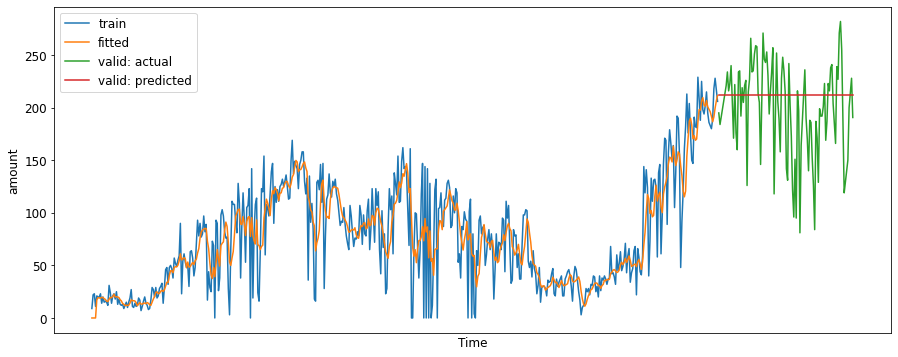

In [181]:
y_fitted = range_average(train, 'amount', 5)
y_pred = []
for i in range(len(X_valid)):
    y_pred.append(y_fitted[-1]) 

forecasting_results(y_fitted, y_pred)

## D. Simple Exponential Smoothing

C:\Users\Jina Kim\anaconda3\envs\BA2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
Mean squared error: 1907.97


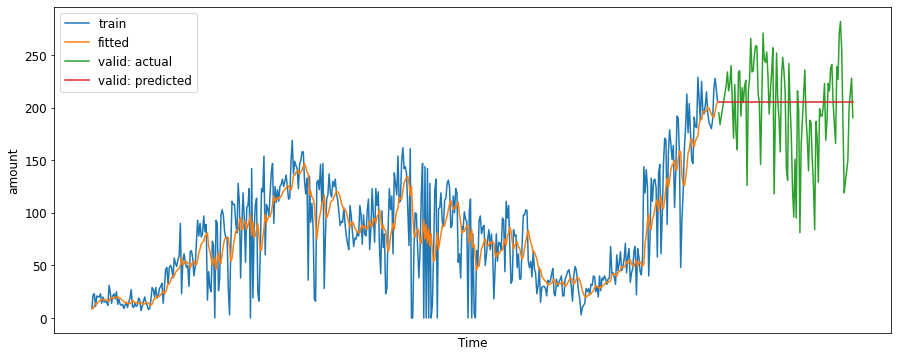

In [182]:
# SES example
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random

X = df['date'].values
X_val_train, X_test = train_test_split(X, test_size=0.15, shuffle=False, random_state=0) 
X_train, X_valid = train_test_split(X_val_train, test_size=1.5/8.5, shuffle=False, random_state=0)

y = df['amount'].values
y_val_train, y_test = train_test_split(y, test_size=0.15, shuffle=False, random_state=0) 
y_train, y_valid = train_test_split(y_val_train, test_size=1.5/8.5, shuffle=False, random_state=0)


data = pd.Series(y.tolist(), X.tolist())
train = pd.Series(y_train.tolist(), X_train.tolist())

#SES
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.2,optimized=False)
y_fitted = fit1.fittedvalues
y_pred = fit1.forecast(len(X_valid)).rename('alpha=0.2')

forecasting_results(y_fitted, y_pred)

## E. Double Exponential Smoothing

C:\Users\Jina Kim\anaconda3\envs\BA2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
Mean squared error: 19004.67


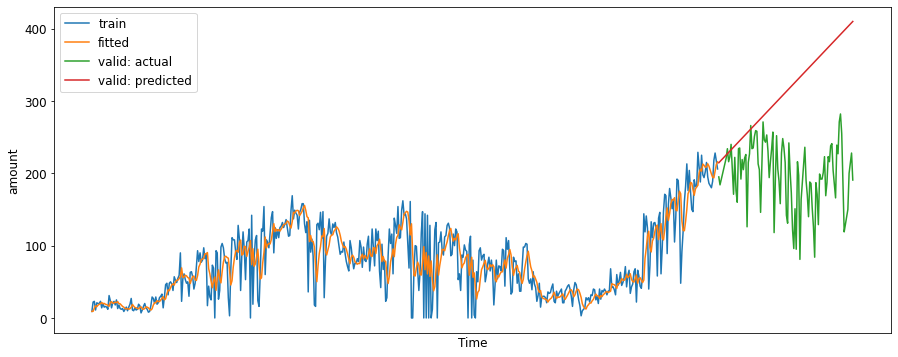

In [183]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fit1 = ExponentialSmoothing(train, trend='add').fit()
y_fitted = fit1.fittedvalues
y_pred = fit1.forecast(len(X_valid)).rename('alpha=0.2')

forecasting_results(y_fitted, y_pred)

## F. Holt-Winters

### (1) Additive Holt-Winters 

C:\Users\Jina Kim\anaconda3\envs\BA2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
Mean squared error: 2912.36


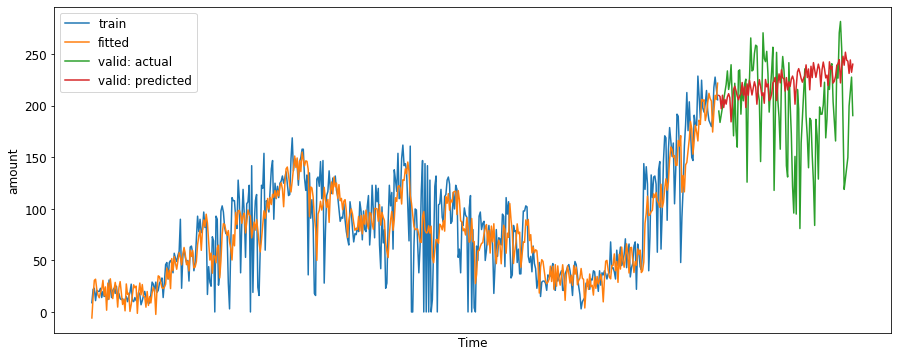

In [184]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fit1 = ExponentialSmoothing(train, trend='add',seasonal='add',seasonal_periods=52).fit()
y_fitted = fit1.fittedvalues
y_pred = fit1.forecast(len(X_valid))

forecasting_results(y_fitted, y_pred)

### (2) Multiplicative Holt-Winters   --> error

In [193]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fit1 = ExponentialSmoothing(train, trend='mul',seasonal='mul',seasonal_periods=52).fit()
y_fitted = fit1.fittedvalues
y_pred = fit1.forecast(len(X_valid))

forecasting_results(y_fitted, y_pred)

C:\Users\Jina Kim\anaconda3\envs\BA2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ValueError: endog must be strictly positive when usingmultiplicative trend or seasonal components.

## 1-2. Holt-Winters parameter optimization
###: alpha, beta, delta 세 개의 parameter에 대해 [0, 1]에서 0.1 간격으로 grid search 수행

### (1) Additive Holt-Winters 

Mean squared error: 1897.26
best parameters:  [0.1, 0.30000000000000004, 0.0]
minimum mse:  1775.5044115541784


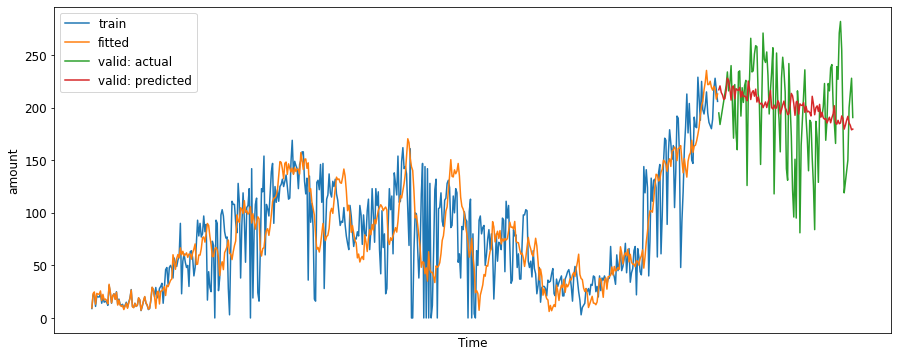

In [199]:
y_test_after_10 = y_test[10:]

from itertools import product

alpha = list(np.arange(0, 1, 0.1))
beta = list(np.arange(0, 1, 0.1))
delta = list(np.arange(0, 1, 0.1))
param_set = list(product(alpha, beta, delta))

mse = []
predicted = []
parameters = []

for alpha, beta, delta in param_set:
    fit1 = ExponentialSmoothing(train, trend='add',seasonal='add').fit(smoothing_level=alpha, smoothing_slope=beta,
smoothing_seasonal=delta)
    y_pred = fit1.forecast(len(X_valid))
    predicted.append(y_pred)
    parameters.append([alpha, beta, delta])

    # The mean squared error
    mse.append(mean_squared_error(y_valid, y_pred))

# 탐색 영역 내 최적의 parameter
best_index = mse.index(min(mse))
best_param = parameters[best_index]
opt_fit = ExponentialSmoothing(train, trend='add',seasonal='add',seasonal_periods=52).fit(smoothing_level=best_param[0],smoothing_slope=best_param[1],
smoothing_seasonal=best_param[2], optimized=False)
y_pred_opt = opt_fit.forecast(len(X_valid))
y_fitted = opt_fit.fittedvalues

forecasting_results(y_fitted, y_pred_opt)

#parameter 따른 mse값
mse_all = pd.DataFrame({'parameters [alpha, beta, delta]': parameters, 'mse': mse})
#print(mse_all)

print('best parameters: ', best_param)
print('minimum mse: ', min(mse))

In [200]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(mse_all)

                       parameters [alpha, beta, delta]            mse
0                                      [0.0, 0.0, 0.0]   8.991625e+03
1                                      [0.0, 0.0, 0.1]   5.054682e+03
2                                      [0.0, 0.0, 0.2]   2.539256e+03
3                      [0.0, 0.0, 0.30000000000000004]   2.302912e+03
4                                      [0.0, 0.0, 0.4]   2.527237e+03
5                                      [0.0, 0.0, 0.5]   2.769079e+03
6                       [0.0, 0.0, 0.6000000000000001]   2.954089e+03
7                       [0.0, 0.0, 0.7000000000000001]   3.080535e+03
8                                      [0.0, 0.0, 0.8]   3.161567e+03
9                                      [0.0, 0.0, 0.9]   3.214245e+03
10                                     [0.0, 0.1, 0.0]   8.991618e+03
11                                     [0.0, 0.1, 0.1]   5.054681e+03
12                                     [0.0, 0.1, 0.2]   2.539257e+03
13                  

In [201]:
print('best result: ',mse_all.iloc[best_index])

best result:  parameters [alpha, beta, delta]    [0.1, 0.30000000000000004, 0.0]
mse                                                         1775.5
Name: 130, dtype: object


### (2) Multiplicative Holt-Winters   ---> error

In [202]:
mse = []
predicted = []
parameters = []

for alpha, beta, delta in param_set:
    fit1 = ExponentialSmoothing(train, trend='mul',seasonal='mul').fit(smoothing_level=alpha, smoothing_slope=beta,
smoothing_seasonal=delta)
    y_pred = fit1.forecast(len(X_valid))
    predicted.append(y_pred)
    parameters.append([alpha, beta, delta])


    # The mean squared error
    mse.append(mean_squared_error(y_valid, y_pred))

# 탐색 영역 내 최적의 parameter
best_index = mse.index(min(mse))
best_param = parameters[best_index]
opt_fit = ExponentialSmoothing(train, trend='mul',seasonal='mul',seasonal_periods=52).fit(smoothing_level=best_param[0],smoothing_slope=best_param[1],
smoothing_seasonal=best_param[2], optimized=False)
y_pred_opt = opt_fit.forecast(len(X_valid))
y_fitted = opt_fit.fittedvalues


forecasting_results(y_fitted, y_pred_opt)

#parameter 따른 mse값
mse_all = pd.DataFrame({'parameters [alpha, beta, delta]': parameters, 'mse': mse})
#print(mse_all)
print('best parameters: ', best_param)
print('minimum mse: ', min(mse))

ValueError: endog must be strictly positive when usingmultiplicative trend or seasonal components.

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(mse_all)

In [204]:
print('best result: ',mse_all.iloc[best_index])

best result:  parameters [alpha, beta, delta]    [0.1, 0.30000000000000004, 0.0]
mse                                                         1775.5
Name: 130, dtype: object


### (1) Simple Expinential Smoothing

Mean squared error: 1862.64
   parameters alpha           mse
0               0.0  37843.697424
1               0.1   1862.640465
2               0.2   1907.973363
3               0.3   1960.504845
4               0.4   1998.311258
5               0.5   2012.863912
6               0.6   2004.957983
7               0.7   1983.127202
8               0.8   1956.885690
9               0.9   1932.809646
best parameters:  0.1
minimum mse:  1862.6404654729238


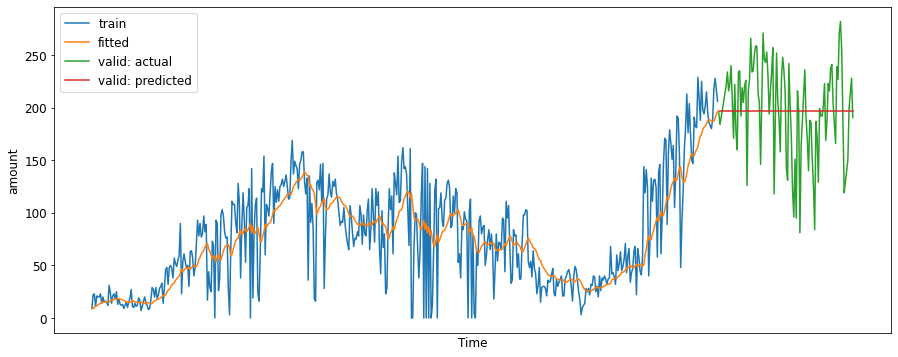

In [206]:
alpha = list(np.arange(0, 1, 0.1))

mse = []
predicted = []
parameters = []
#SES
for alpha in alpha:
    fit1 = SimpleExpSmoothing(train).fit(smoothing_level=alpha,optimized=False)
    y_pred = fit1.forecast(len(X_valid)).rename('alpha=0.2')
    predicted.append(y_pred)
    parameters.append(alpha)
    
    mse.append(mean_squared_error(y_valid, y_pred))


# 탐색 영역 내 최적의 parameter
best_index = mse.index(min(mse))
best_param = parameters[best_index]
opt_fit = SimpleExpSmoothing(train).fit(smoothing_level=best_param,optimized=False)
y_pred_opt = opt_fit.forecast(len(X_valid))
y_fitted = opt_fit.fittedvalues


forecasting_results(y_fitted, y_pred_opt)

#parameter 따른 mse값
mse_all = pd.DataFrame({'parameters alpha': parameters, 'mse': mse})
print(mse_all)

print('best parameters: ', best_param)
print('minimum mse: ', min(mse))

### Double Exponential Smoothing

Mean squared error: 1784.93
best parameters:  [0.1, 0.30000000000000004]
minimum mse:  1784.92870263989


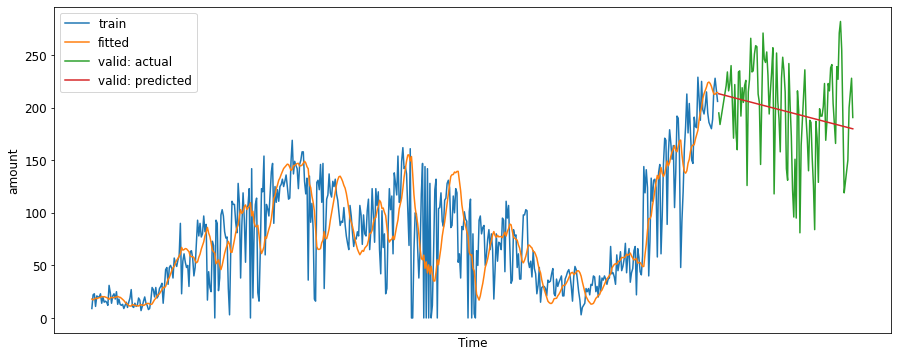

In [207]:
alpha = list(np.arange(0, 1, 0.1))
beta = list(np.arange(0, 1, 0.1))

mse = []
predicted = []
parameters = []

#DES
for alpha, beta in list(product(alpha, beta)):
    fit1 = ExponentialSmoothing(train, trend='add').fit(smoothing_level=alpha, smoothing_slope=beta)
    y_pred = fit1.forecast(len(X_valid))
    predicted.append(y_pred)
    parameters.append([alpha, beta])

    #최소 10 시점 이후 예측
    y_pred_after_10 = y_pred[10:]  

    # The mean squared error
    mse.append(mean_squared_error(y_valid, y_pred))


# 탐색 영역 내 최적의 parameter
best_index = mse.index(min(mse))
best_param = parameters[best_index]
opt_fit = ExponentialSmoothing(train, trend='add').fit(smoothing_level=best_param[0], smoothing_slope=best_param[1])
y_pred_opt = opt_fit.forecast(len(X_valid))
y_fitted = opt_fit.fittedvalues

forecasting_results(y_fitted, y_pred_opt)

#parameter 따른 mse값
mse_all = pd.DataFrame({'parameters [alpha, beta]': parameters, 'mse': mse})

print('best parameters: ', best_param)
print('minimum mse: ', min(mse))